In [3]:
##preliminaries
#standard library imports
import random
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#statsmodels
import statsmodels
import statsmodels.tsa.stattools as ts

# ARMA Process

## White Noise

Realization of a fair coin flip, with(-1,1) for (T,H)

In [4]:
#White Noise
ssize = 201
domain = range(ssize)

prng = random.Random(314159)
wncf01 = list(prng.choice([-1,1]) for _ in range(ssize))

print(wncf01)

[-1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1]


In [5]:
#Numpy approach
nprng = np.random.RandomState(314159)
wncf02 = nprng.choice([-1,1], size=ssize)
print(wncf02)

[ 1  1 -1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1
 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1
 -1  1  1 -1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1  1
 -1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1  1
  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1
 -1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1  1  1 -1 -1  1  1
 -1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1
  1]


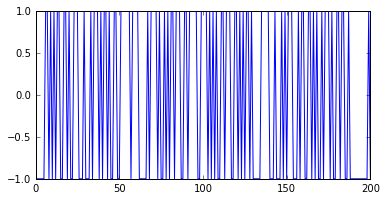

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(domain, wncf01)

## Moving Average

In [7]:
#deque recipes
#moving average (order q)
from collections import deque
from itertools import islice
def movav(itr,q):
    itr = iter(itr)
    start = islice(itr, q)
    d = deque(start, maxlen=1+q)
    n = 1.0 + q
    for elem in itr:
        d.append(elem)
        yield sum(d) / n
##
ma7 = list(movav(wncf01,7))
print(ma7)
#ma7 = list(movav(wncf01,7))

[-0.5, -0.5, -0.25, -0.25, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, -0.25, 0.0, 0.25, 0.25, 0.0, 0.0, -0.25, 0.0, 0.0, -0.25, -0.5, -0.5, -0.5, -0.25, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, -0.25, 0.0, 0.0, 0.25, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.5, 0.25, 0.0, 0.0, -0.25, -0.25, -0.5, -0.5, -0.25, 0.0, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.0, 0.0, -0.25, 0.0, 0.0, 0.0, 0.25, 0.25, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.75, 0.5, 0.25, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.25, 0.5, 0.25, 0.25, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0, 0.0, -0.25, -0.25, -0.5, -0.5, -0.25, -0.25, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, -0.25, -0.5, -0.5, -0.5, -0.25, -0.25, -0.25, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, -0.25, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.25, 0.0, 0.25, 0.25, 0

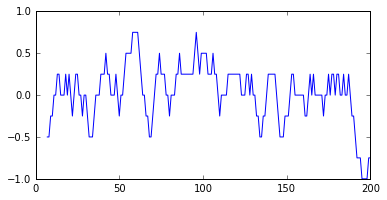

In [8]:
fig, ax = plt.subplots(1,1,figsize = (6,3))
q = 7
ax.plot(domain[q:],ma7)
ax.set_ylim((-1,1));

## Autoregressive Process

$ x_t = \mu_0 + \mu_1x_{t-1} + u_t $

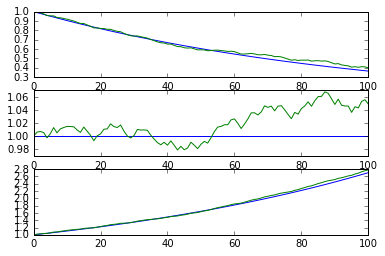

In [9]:
##AR(1)
def ar1(mu, x, shocks):
    yield x
    for shock in shocks:
        x_1 = x
        x = mu * x_1 + shock
        yield x
        
nshocks = 100
noshocks = np.zeros(nshocks)
nprng = np.random.RandomState(314159)
uni = nprng.uniform(-0.01, 0.01, nshocks)

time = range(nshocks+1)
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
for mu, ax in zip([0.99,1.0,1.01], (ax1,ax2,ax3)):
    ar1gen00 = ar1(mu,1,noshocks)
    ax.plot(time, list(ar1gen00))
    ar1gen01 = ar1(mu,1,uni)
    ax.plot(time, list(ar1gen01))
    #ax.text(0,0.5, " mu-{}".format(mu), transform-ax.trans)

In [11]:
x = np.fromiter(ar1(0.99,1,uni), dtype=np.float)
result = ts.adfuller(x, maxlag=1, store=True)
print(result[-1].adfstat, result[-1].critvalues)
print result[-1].resols.summary()

(-3.3287851414261236, {'5%': -2.8909064400000002, '1%': -3.4975010329999998, '10%': -2.5824349})
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.08
Date:                Tue, 22 Mar 2016   Prob (F-statistic):            0.00123
Time:                        19:40:21   Log-Likelihood:                 370.20
No. Observations:                 100   AIC:                            -736.4
Df Residuals:                      98   BIC:                            -731.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------